In [2]:
import numpy as np

In [3]:
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv",delimiter = ",")

In [4]:
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv",delimiter = ",")

In [5]:
import networkx as nx

In [6]:
G1 = nx.to_networkx_graph(A1)

In [7]:
G2 = nx.to_networkx_graph(A2)

In [10]:
def basic_net_stats(G):
    """xxx"""
    print("Number of nodes: {}".format(G.number_of_nodes()))
    print("Number of edge: {}".format(G.number_of_edges()))
    print("Mean degree of the nodes: {0:.2f}".format(np.mean([n for d,n in G.degree()])))

In [11]:
basic_net_stats(G1)

Number of nodes: 843
Number of edge: 3405
Mean degree of the nodes: 8.08


In [12]:
basic_net_stats(G2)

Number of nodes: 877
Number of edge: 3063
Mean degree of the nodes: 6.99


In [17]:
def plot_degree_distribution(G):
    """The input is a graph.
    Output i the degree distribution of the nodes."""
    degree_seq = [d for n,d in G.degree()]
    plt.hist(degree_seq,histtype = "step")
    plt.xlabel("Degree $k$")
    plt.ylabel("P$(k)$")
    plt.title("Degree distribution")

In [14]:
import matplotlib.pyplot as plt

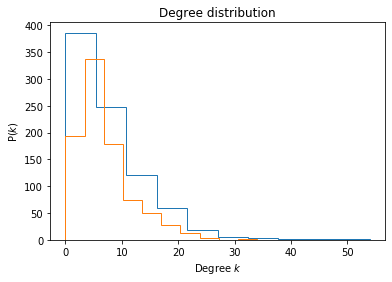

In [18]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("village_hist.pdf")

#### Maximum number of peole have around 0-20 connections/degrees, where a few people have large number of connections. These statistics are so much unlike that that of an ER graph.

In [19]:
def ER_graph_generator(N,p):
    """Takes 2 parameters, N(number of nodes) and p(probability of adding an edge between any pair of nodes).
    Generates an Erdos-Renyi Graph of N nodes with p probability."""
    G = nx.Graph()#create empty graph
    G.add_nodes_from(range(N))#insert N nodes
    for n1 in G.nodes():
        for n2 in G.nodes():
            if n1!=n2:
                if bernoulli.rvs(p=p) and n1<n2: # if and only if the rvs produces a 1 this statemnt will be executed # undirected and each node pair will be inserted just one time
                    G.add_edge(n1,n2)
    return G

#### Finding the largest connected component-

In [89]:
g1 = sorted(nx.connected_components(G1),key = len,reverse = True)

In [90]:
type(g1)

list

In [91]:
len(g1[0])

825

In [92]:
len(g1[1])

4

In [106]:
G1_LCC = g1[0] #as sorted, this is the largest component and has 825 nodes coonected.

In [107]:
type(G1_LCC)

set

In [94]:
for char in g1:
    print(len(char))

825
4
4
3
3
2
1
1


In [95]:
g2 = sorted(nx.connected_components(G2),key = len,reverse = True)

In [97]:
type(g2)

list

In [99]:
len(g2[0]) # number of nodes in the maximum connected component.

810

In [100]:
G2_LCC = g2[0]

In [103]:
len(G1_LCC)/G1.number_of_nodes() # 97% of the nodes in G1 is in the largest connected component.

0.9786476868327402

In [104]:
len(G2_LCC)/G2.number_of_nodes() # 92% of the nodes in G2 is in the largest connected component.

0.9236031927023945

In [112]:
graph_G1_LCC = G1.subgraph(nodes = list(G1_LCC))

In [113]:
graph_G2_LCC = G2.subgraph(nodes = list(G2_LCC))

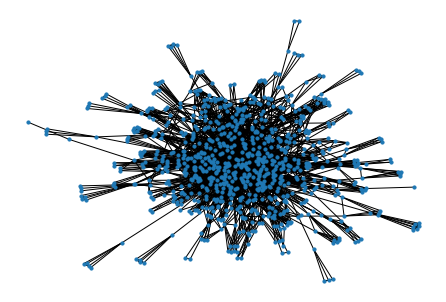

In [116]:
nx.draw(graph_G1_LCC,node_size = 10)
plt.savefig("Village_1.pdf")

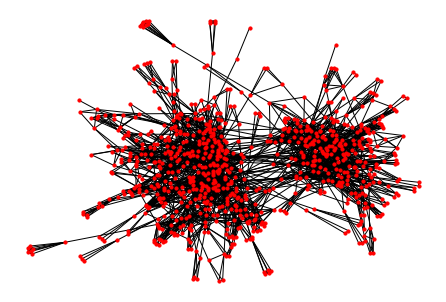

In [117]:
nx.draw(graph_G2_LCC,node_color = "red",node_size = 10)
plt.savefig("Village_2.pdf")

The graph layouts are stochastic, meaning that everytime I run this code, we will get somewhat different layout.

The two group of connected groups in G2 are called network communities.